### Relevant imports and data load

In [42]:
import pandas as pd
import numpy as np
import math
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.patches import Ellipse

from scipy import stats
from scipy.spatial.distance import mahalanobis

from sklearn.covariance import EmpiricalCovariance

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

%matplotlib inline

In [43]:
# load data which is stored in the /data folder of the project
train_data = pd.read_csv('../data/train_filled_up.csv', sep=',', header=0)

In [44]:
target_variable = train_data["SalePrice"]

In [45]:
# print the low range and the high range of a (scaled) variable
def print_ranges(low_range, high_range):
    print('outer range (low) of the distribution')
    print(low_range)
    print('outer range (high) of the distribution')
    print(high_range)

In [46]:
# scale a given variable and print its low and high ranges
def scale_variable(variable):
    scaled_variable = StandardScaler().fit_transform(variable.values.reshape(-1,1))
    low_range = scaled_variable[scaled_variable[:,0].argsort()][:10]
    high_range = scaled_variable[scaled_variable[:,0].argsort()][-10:]
    print_ranges(low_range, high_range)
    return scaled_variable

In [47]:
def ellipse_coord(cov_matrix):
    
    eig_values, eig_vectors = np.linalg.eig(cov_matrix)
    eig_vectors = np.matrix.transpose(eig_vectors)
    
    return eig_values, eig_vectors

In [48]:
def define_ellipse(x, y):
    x_mean = x.mean()
    y_mean = y.mean()
    center_dataset = (x_mean, y_mean)
    
    x_var = np.var(x)
    y_var = np.var(y)
    
    cov_xy = np.cov(x,y)
    
    center_ellipse = center_dataset
    eig_values, eig_vectors = ellipse_coord(cov_xy)
    
    width_ellipse = 2*(math.sqrt(eig_values[0] * 9.21))
    height_ellipse = 2*(math.sqrt(eig_values[1] * 9.21))
    angle_ellipse = (np.arctan(eig_vectors[0][1]/eig_vectors[1][1]))*180/np.pi
    
    print('width: ', width_ellipse)
    print('heigth: ', height_ellipse)
    print('angle: ', angle_ellipse)
    
    ellipse = Ellipse(xy=center_ellipse, width=width_ellipse, height=height_ellipse, angle= angle_ellipse,
                      edgecolor='r', fc='None', lw=2)
    
    return center_dataset, ellipse

In [57]:
def bivariate_outlier_analysis(x, y):
    plt.figure()
    ax = plt.gca()
    
    center_dataset, ellipse = define_ellipse(x, y)
    
    plt.scatter(x,y)
    plt.plot(center_dataset[0],center_dataset[1],'ro')
    
    for xy in zip(x,y):
        ax.annotate('(%s,%s)'% xy, xy=xy, textcoords='data')
    
    ax.add_patch(ellipse)

## Analyze target variable

In [50]:
target_variable.describe()

count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

##### Univariate outliers

In [51]:
saleprice_scaled = scale_variable(target_variable)

outer range (low) of the distribution
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
outer range (high) of the distribution
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


usually, threshold is set to -2.5 and +2.5 with small (80 or fewer) sample sizes
threshold is set -4.0 and +4.0 with large sample sizes
This means we have some outliers at the higher end in this case. Lower end seems to be ok. 

/Applications/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


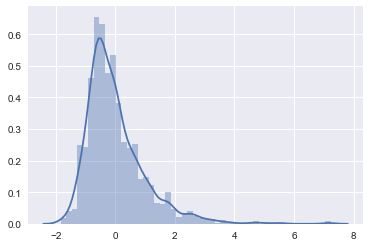

In [28]:
sns.distplot(saleprice_scaled)

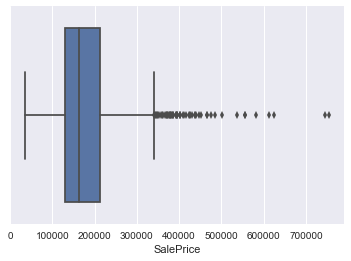

In [9]:
sns.boxplot(target_variable)

As all these extreme values still seem to be feasible for houseprices, no outliers will be deleted. 

## Analyze numeric features 
outliers and test underlying assumptions 

Outliers
- univariate (histogram and boxplot of respective variable)
- bivariate (variable together with target variable)
- mahalanois distance overall 

#### LotFrontage

In [19]:
train_data['LotFrontage'].describe()

count    1459.000000
mean       70.047936
std        22.031439
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

##### Univariate outliers

In [115]:
lotfrontage_scaled = scale_variable(train_data['LotFrontage'])

outer range (low) of the distribution
[[-3.60664911]
 [-3.60664911]
 [-3.60664911]
 [-3.60664911]
 [-3.60664911]
 [-3.60664911]
 [-3.60664911]
 [-3.60664911]
 [-3.60664911]
 [-3.60664911]]
outer range (high) of the distribution
[[ 2.52335278]
 [ 2.56464912]
 [ 2.58509396]
 [ 2.72457279]
 [ 2.87669214]
 [ 2.98610084]
 [ 2.98610084]
 [ 3.12625154]
 [ 4.81672702]
 [ 4.81672702]]


/Applications/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


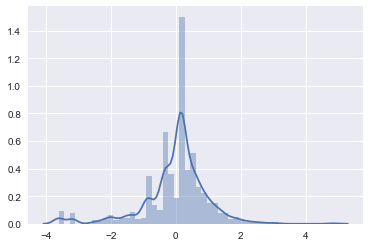

In [104]:
sns.distplot(lotfrontage_scaled)

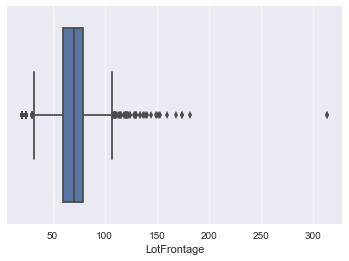

In [24]:
sns.boxplot(train_data['LotFrontage']);

These values seem to be feasible. No reason for deletion. It could be argued that extraordinary large LotFrontages shouldn't be taken into consideration. As they are a minority and the study should fit for the mass instead of particular huge estates. So in a second attemt, maybe the 300+ square feet LotFrontages should be 'deleted'. 

#### LotArea

In [94]:
train_data['LotArea'].describe()

count      1459.000000
mean      10517.363948
std        9984.666267
min        1300.000000
25%        7549.000000
50%        9477.000000
75%       11603.000000
max      215245.000000
Name: LotArea, dtype: float64

##### Univariate outliers

In [46]:
lotarea_scaled = scale_variable(train_data['LotArea'])

outer range (low) of the distribution
[[-0.92346846]
 [-0.9057352 ]
 [-0.90433257]
 [-0.90082599]
 [-0.90012467]
 [-0.90012467]
 [-0.89381284]
 [-0.88539705]
 [-0.88539705]
 [-0.88539705]]
outer range (high) of the distribution
[[  4.26696676]
 [  4.27898931]
 [  4.30674136]
 [  4.67703589]
 [  5.34699246]
 [  6.03568418]
 [ 10.48282526]
 [ 14.87616544]
 [ 15.44322903]
 [ 20.51123462]]


/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


/Applications/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


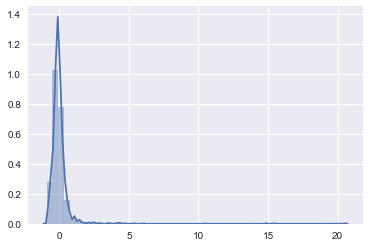

In [121]:
sns.distplot(lotarea_scaled)

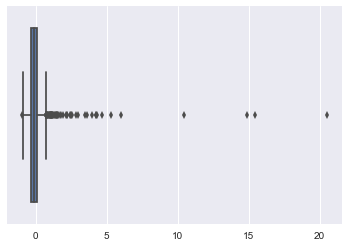

In [122]:
sns.boxplot(lotarea_scaled)

##### Bivariate outliers

width:  58422.993407035625
heigth:  482613.42191263067
angle:  -1.9268587605


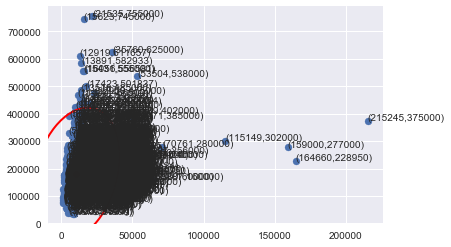

In [54]:
bivariate_outlier_analysis(train_data["LotArea"], target_variable)

#### BsmtFinSF1

In [122]:
train_data["BsmtFinSF1"].describe()

count    1459.000000
mean      443.943797
std       456.106417
min         0.000000
25%         0.000000
50%       384.000000
75%       712.500000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

##### Univariate outliers

In [123]:
bsmtfinsf1_scaled = scale_variable(train_data['BsmtFinSF1'])

outer range (low) of the distribution
[[-0.97366754]
 [-0.97366754]
 [-0.97366754]
 [-0.97366754]
 [-0.97366754]
 [-0.97366754]
 [-0.97366754]
 [-0.97366754]
 [-0.97366754]
 [-0.97366754]]
outer range (high) of the distribution
[[  2.74603789]
 [  2.80086845]
 [  2.90175669]
 [  2.99606526]
 [  3.14959084]
 [  3.20222818]
 [  3.62332691]
 [  3.82510338]
 [  3.9830154 ]
 [ 11.40488049]]


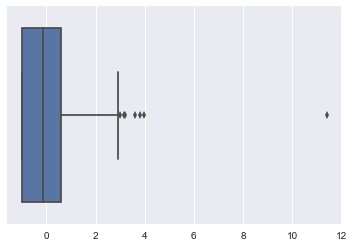

In [128]:
sns.boxplot(bsmtfinsf1_scaled)

##### Bivariate outliers

width:  2553.316890325293
heigth:  482345.7213576873
angle:  -0.127080997932


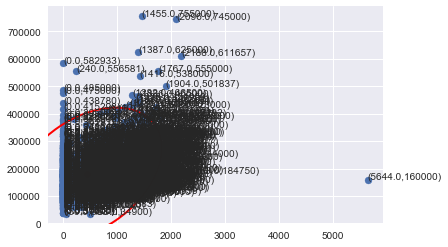

In [58]:
bivariate_outlier_analysis(train_data["BsmtFinSF1"], target_variable)

#### BsmtFinSF2

In [124]:
train_data['BsmtFinSF2'].describe()

count    1459.000000
mean       46.581220
std       161.369977
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

##### Univariate outliers

In [125]:
bsmtfinsf2_scaled = scale_variable(train_data['BsmtFinSF2'])

outer range (low) of the distribution
[[-0.28875998]
 [-0.28875998]
 [-0.28875998]
 [-0.28875998]
 [-0.28875998]
 [-0.28875998]
 [-0.28875998]
 [-0.28875998]
 [-0.28875998]
 [-0.28875998]]
outer range (high) of the distribution
[[ 6.09007725]
 [ 6.10247538]
 [ 6.26365105]
 [ 6.28844731]
 [ 6.30084544]
 [ 6.40622953]
 [ 6.43722485]
 [ 6.65419211]
 [ 6.69758556]
 [ 8.84866089]]


/Applications/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


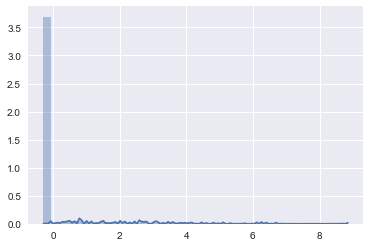

In [127]:
sns.distplot(bsmtfinsf2_scaled)

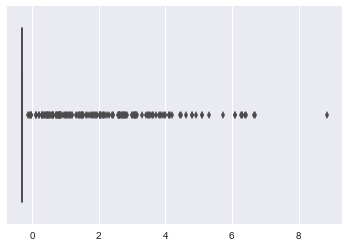

In [126]:
sns.boxplot(bsmtfinsf2_scaled)

167 observations that have a value != 0 out of more than 1400. Suggestion to delete this feature. 

#### BsmtUnfSF

In [129]:
train_data['BsmtUnfSF'].describe()

count    1459.000000
mean      567.366004
std       441.992392
min         0.000000
25%       223.000000
50%       479.000000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

##### Univariate outliers

In [130]:
bsmtunfsf_scaled = scale_variable(train_data['BsmtUnfSF'])

outer range (low) of the distribution
[[-1.28409572]
 [-1.28409572]
 [-1.28409572]
 [-1.28409572]
 [-1.28409572]
 [-1.28409572]
 [-1.28409572]
 [-1.28409572]
 [-1.28409572]
 [-1.28409572]]
outer range (high) of the distribution
[[ 3.03193754]
 [ 3.07493944]
 [ 3.09530877]
 [ 3.17225954]
 [ 3.24694706]
 [ 3.33747739]
 [ 3.34653042]
 [ 3.51627478]
 [ 3.58869904]
 [ 4.00287528]]


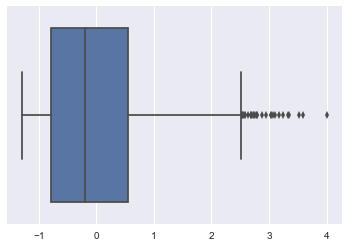

In [131]:
sns.boxplot(bsmtunfsf_scaled)

Looks ok. no need for further analysis

#### TotalBsmtSF

In [132]:
train_data['TotalBsmtSF'].describe()

count    1459.000000
mean     1057.891021
std       438.500975
min         0.000000
25%       796.000000
50%       992.000000
75%      1298.500000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

##### Univariate outliers

In [133]:
totalbsmtsf_scaled = scale_variable(train_data['TotalBsmtSF'])

outer range (low) of the distribution
[[-2.41334411]
 [-2.41334411]
 [-2.41334411]
 [-2.41334411]
 [-2.41334411]
 [-2.41334411]
 [-2.41334411]
 [-2.41334411]
 [-2.41334411]
 [-2.41334411]]
outer range (high) of the distribution
[[  3.04347422]
 [  3.05259933]
 [  3.1621007 ]
 [  3.34460299]
 [  3.59326235]
 [  4.64493177]
 [  4.74530803]
 [  4.8867473 ]
 [  4.90043497]
 [ 11.52526793]]


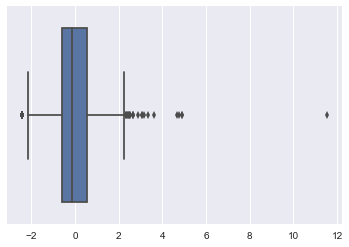

In [134]:
sns.boxplot(totalbsmtsf_scaled)

##### Bivariate outliers

width:  2100.9415439967634
heigth:  482347.3024236396
angle:  -0.194090094046


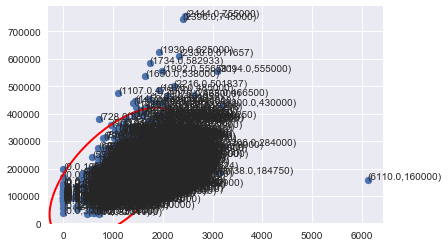

In [59]:
bivariate_outlier_analysis(train_data["TotalBsmtSF"], target_variable)

#### 2ndFlrSF

In [135]:
train_data['2ndFlrSF'].describe()

count    1459.000000
mean      346.791638
std       436.610637
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64

##### Univariate outliers

In [136]:
secondflrsf_scaled = scale_variable(train_data['2ndFlrSF'])

outer range (low) of the distribution
[[-0.79455358]
 [-0.79455358]
 [-0.79455358]
 [-0.79455358]
 [-0.79455358]
 [-0.79455358]
 [-0.79455358]
 [-0.79455358]
 [-0.79455358]
 [-0.79455358]]
outer range (high) of the distribution
[[ 2.68571168]
 [ 2.6948763 ]
 [ 2.72924363]
 [ 2.73382594]
 [ 2.84609256]
 [ 2.89649798]
 [ 3.32036176]
 [ 3.37076718]
 [ 3.49448958]
 [ 3.9366826 ]]


/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


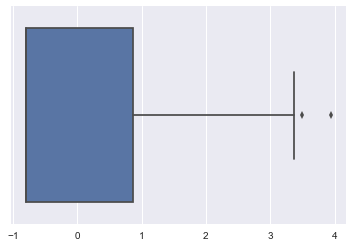

In [137]:
sns.boxplot(secondflrsf_scaled)

#### LowQualFinSF

In [138]:
train_data['LowQualFinSF'].describe()

count    1459.000000
mean        5.848526
std        48.639512
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64

##### Univariate outliers

In [139]:
lowqualfinsf_scaled = scale_variable(train_data['LowQualFinSF'])

outer range (low) of the distribution
[[-0.12028352]
 [-0.12028352]
 [-0.12028352]
 [-0.12028352]
 [-0.12028352]
 [-0.12028352]
 [-0.12028352]
 [-0.12028352]
 [-0.12028352]
 [-0.12028352]]
outer range (high) of the distribution
[[  8.04460351]
 [  8.51763223]
 [  9.60765493]
 [  9.73105373]
 [  9.77218666]
 [ 10.43031358]
 [ 10.45088004]
 [ 10.47144651]
 [ 10.73881057]
 [ 11.64373508]]


/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


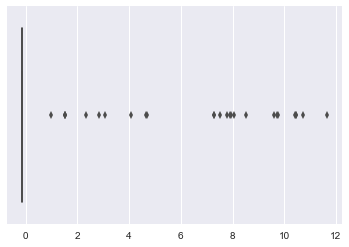

In [140]:
sns.boxplot(lowqualfinsf_scaled)

Only 26 values != 0. Suggestion to delete this feature. 

#### GrLivArea

In [141]:
train_data['GrLivArea'].describe()

count    1459.000000
mean     1515.546950
std       525.650927
min       334.000000
25%      1129.000000
50%      1464.000000
75%      1777.500000
max      5642.000000
Name: GrLivArea, dtype: float64

##### Univariate outliers

In [171]:
grlivarea_scaled = scale_variable(train_data['GrLivArea'])

outer range (low) of the distribution
[[-2.2485494 ]
 [-2.05063163]
 [-1.9707033 ]
 [-1.89458108]
 [-1.73282136]
 [-1.71188775]
 [-1.68524498]
 [-1.68524498]
 [-1.68524498]
 [-1.68524498]]
outer range (high) of the distribution
[[ 3.35594899]
 [ 3.57670343]
 [ 3.67566231]
 [ 3.76320286]
 [ 3.98205424]
 [ 4.0182123 ]
 [ 5.32941752]
 [ 5.6339064 ]
 [ 6.0145175 ]
 [ 7.85286909]]


/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


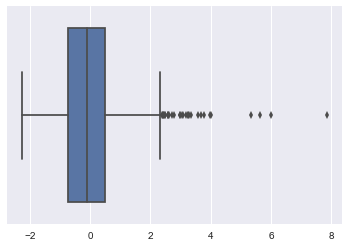

In [143]:
sns.boxplot(grlivarea_scaled)

##### Bivariate outliers

width:  2251.161029123882
heigth:  482349.8335180696
angle:  -0.268559634916


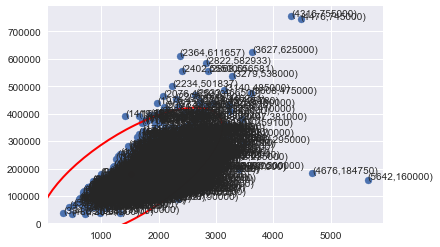

In [60]:
bivariate_outlier_analysis(train_data["GrLivArea"], target_variable)

#### BsmtFullBath

In [144]:
train_data['BsmtFullBath'].describe()

count    1459.000000
mean        0.425634
std         0.518969
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64

In [146]:
bsmtfullbath_scaled = scale_variable(train_data['BsmtFullBath'])

outer range (low) of the distribution
[[-0.82043438]
 [-0.82043438]
 [-0.82043438]
 [-0.82043438]
 [-0.82043438]
 [-0.82043438]
 [-0.82043438]
 [-0.82043438]
 [-0.82043438]
 [-0.82043438]]
outer range (high) of the distribution
[[ 3.0346824 ]
 [ 3.0346824 ]
 [ 3.0346824 ]
 [ 3.0346824 ]
 [ 3.0346824 ]
 [ 3.0346824 ]
 [ 3.0346824 ]
 [ 3.0346824 ]
 [ 3.0346824 ]
 [ 4.96224079]]


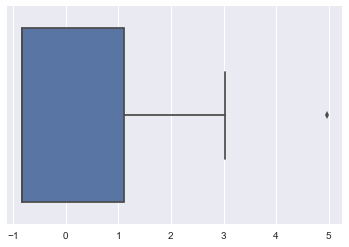

In [147]:
sns.boxplot(bsmtfullbath_scaled)

#### BsmtHalfBath

In [148]:
train_data['BsmtHalfBath'].describe()

count    1459.000000
mean        0.057574
std         0.238830
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64

##### Univariate outliers

In [149]:
bsmthalfbath_scaled = scale_variable(train_data['BsmtHalfBath'])

outer range (low) of the distribution
[[-0.24114844]
 [-0.24114844]
 [-0.24114844]
 [-0.24114844]
 [-0.24114844]
 [-0.24114844]
 [-0.24114844]
 [-0.24114844]
 [-0.24114844]
 [-0.24114844]]
outer range (high) of the distribution
[[ 3.94737023]
 [ 3.94737023]
 [ 3.94737023]
 [ 3.94737023]
 [ 3.94737023]
 [ 3.94737023]
 [ 3.94737023]
 [ 3.94737023]
 [ 8.13588889]
 [ 8.13588889]]


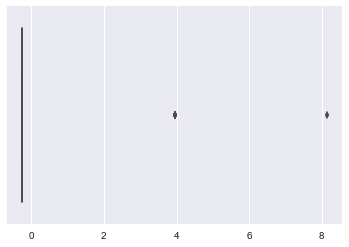

In [151]:
sns.boxplot(bsmthalfbath_scaled)

#### FullBath

In [152]:
train_data['FullBath'].describe()

count    1459.000000
mean        1.564770
std         0.550987
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64

##### Univariate outliers

In [153]:
fullbath_scaled = scale_variable(train_data['FullBath'])

outer range (low) of the distribution
[[-2.84091498]
 [-2.84091498]
 [-2.84091498]
 [-2.84091498]
 [-2.84091498]
 [-2.84091498]
 [-2.84091498]
 [-2.84091498]
 [-2.84091498]
 [-1.02536747]]
outer range (high) of the distribution
[[ 2.60572753]
 [ 2.60572753]
 [ 2.60572753]
 [ 2.60572753]
 [ 2.60572753]
 [ 2.60572753]
 [ 2.60572753]
 [ 2.60572753]
 [ 2.60572753]
 [ 2.60572753]]


/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


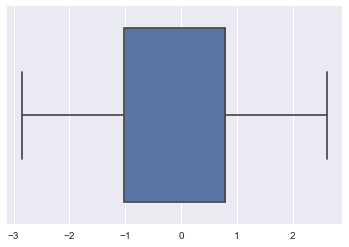

In [154]:
sns.boxplot(fullbath_scaled)

#### HalfBath

In [155]:
train_data['HalfBath'].describe()

count    1459.000000
mean        0.382454
std         0.502798
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64

##### Univariate outliers

In [156]:
halfbath_scaled = scale_variable(train_data['HalfBath'])

outer range (low) of the distribution
[[-0.76091176]
 [-0.76091176]
 [-0.76091176]
 [-0.76091176]
 [-0.76091176]
 [-0.76091176]
 [-0.76091176]
 [-0.76091176]
 [-0.76091176]
 [-0.76091176]]
outer range (high) of the distribution
[[ 3.21819312]
 [ 3.21819312]
 [ 3.21819312]
 [ 3.21819312]
 [ 3.21819312]
 [ 3.21819312]
 [ 3.21819312]
 [ 3.21819312]
 [ 3.21819312]
 [ 3.21819312]]


/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


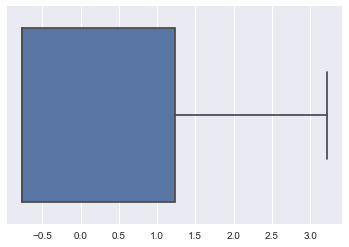

In [157]:
sns.boxplot(halfbath_scaled)

#### BedroomAbvGr

In [9]:
train_data['BedroomAbvGr'].describe()

count    1459.000000
mean        2.866347
std         0.816050
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64

##### Univariate outliers

In [10]:
bedroomabvgr_scaled = scale_variable(train_data['BedroomAbvGr'])

outer range (low) of the distribution
[[-3.51366794]
 [-3.51366794]
 [-3.51366794]
 [-3.51366794]
 [-3.51366794]
 [-3.51366794]
 [-2.28783305]
 [-2.28783305]
 [-2.28783305]
 [-2.28783305]]
outer range (high) of the distribution
[[ 2.61550653]
 [ 2.61550653]
 [ 3.84134142]
 [ 3.84134142]
 [ 3.84134142]
 [ 3.84134142]
 [ 3.84134142]
 [ 3.84134142]
 [ 3.84134142]
 [ 6.29301121]]


/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


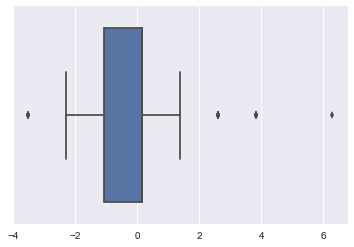

In [12]:
sns.boxplot(bedroomabvgr_scaled)

#### KitchenAbvGr

In [11]:
train_data['KitchenAbvGr'].describe()

count    1459.000000
mean        1.046607
std         0.220410
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64

##### Univariate outliers

In [13]:
kitchenabvgr_scaled = scale_variable(train_data['KitchenAbvGr'])

outer range (low) of the distribution
[[-4.75007652]
 [-0.21152928]
 [-0.21152928]
 [-0.21152928]
 [-0.21152928]
 [-0.21152928]
 [-0.21152928]
 [-0.21152928]
 [-0.21152928]
 [-0.21152928]]
outer range (high) of the distribution
[[ 4.32701797]
 [ 4.32701797]
 [ 4.32701797]
 [ 4.32701797]
 [ 4.32701797]
 [ 4.32701797]
 [ 4.32701797]
 [ 4.32701797]
 [ 8.86556522]
 [ 8.86556522]]


/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


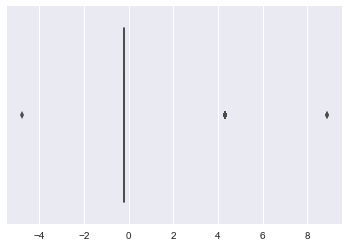

In [14]:
sns.boxplot(kitchenabvgr_scaled)

##### Bivariate outliers

width:  1.3253935607284022
heigth:  482344.5349552159
angle:  2.16017672528e-05


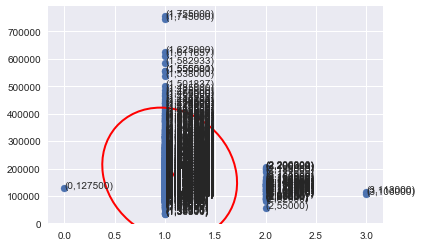

In [61]:
bivariate_outlier_analysis(train_data["KitchenAbvGr"], target_variable)

#### Fireplaces

In [15]:
train_data['Fireplaces'].describe()

count    1459.000000
mean        0.613434
std         0.644687
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64

##### Univariate outliers

In [16]:
fireplaces_scaled = scale_variable(train_data['Fireplaces'])

outer range (low) of the distribution
[[-0.95184762]
 [-0.95184762]
 [-0.95184762]
 [-0.95184762]
 [-0.95184762]
 [-0.95184762]
 [-0.95184762]
 [-0.95184762]
 [-0.95184762]
 [-0.95184762]]
outer range (high) of the distribution
[[ 2.15149467]
 [ 2.15149467]
 [ 2.15149467]
 [ 2.15149467]
 [ 2.15149467]
 [ 3.70316582]
 [ 3.70316582]
 [ 3.70316582]
 [ 3.70316582]
 [ 3.70316582]]


/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


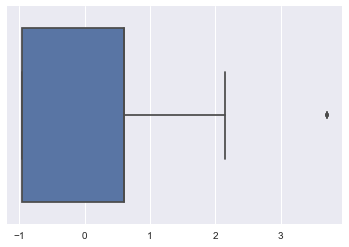

In [17]:
sns.boxplot(fireplaces_scaled)

#### GarageCars

In [18]:
train_data['GarageCars'].describe()

count    1459.000000
mean        1.766964
std         0.747546
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64

##### Univariate outliers

In [19]:
garagecars_scaled = scale_variable(train_data['GarageCars'])

outer range (low) of the distribution
[[-2.36449488]
 [-2.36449488]
 [-2.36449488]
 [-2.36449488]
 [-2.36449488]
 [-2.36449488]
 [-2.36449488]
 [-2.36449488]
 [-2.36449488]
 [-2.36449488]]
outer range (high) of the distribution
[[ 1.6500102 ]
 [ 1.6500102 ]
 [ 1.6500102 ]
 [ 1.6500102 ]
 [ 1.6500102 ]
 [ 2.98817856]
 [ 2.98817856]
 [ 2.98817856]
 [ 2.98817856]
 [ 2.98817856]]


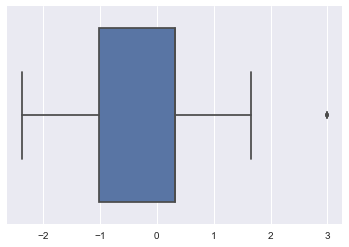

In [20]:
sns.boxplot(garagecars_scaled)

#### WoodDeckSF

In [21]:
train_data['WoodDeckSF'].describe()

count    1459.000000
mean       94.240576
std       125.381679
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64

##### Univariate outliers

In [22]:
wooddecksf_scaled = scale_variable(train_data['WoodDeckSF'])

outer range (low) of the distribution
[[-0.75188727]
 [-0.75188727]
 [-0.75188727]
 [-0.75188727]
 [-0.75188727]
 [-0.75188727]
 [-0.75188727]
 [-0.75188727]
 [-0.75188727]
 [-0.75188727]]
outer range (high) of the distribution
[[ 3.63622258]
 [ 3.82770373]
 [ 3.8436605 ]
 [ 3.92344431]
 [ 4.31438501]
 [ 4.5776716 ]
 [ 4.59362836]
 [ 5.05637449]
 [ 5.12020154]
 [ 6.08558571]]


/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


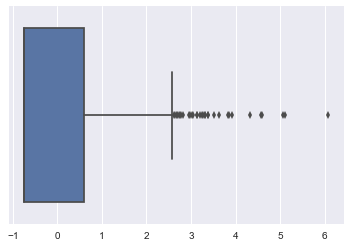

In [23]:
sns.boxplot(wooddecksf_scaled)

##### Bivariate outliers

width:  719.8545455334423
heigth:  482344.59814140986
angle:  -0.0293272016358


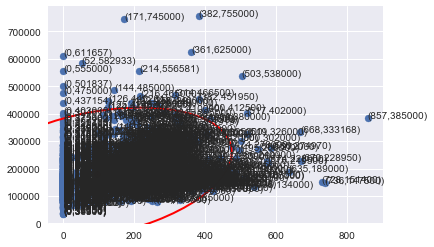

In [62]:
bivariate_outlier_analysis(train_data["WoodDeckSF"], target_variable)

#### OpenPorchSF

In [24]:
train_data['OpenPorchSF'].describe()

count    1459.000000
mean       46.692255
std        66.267472
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64

##### Univariate outliers

In [25]:
openporchsf_scaled = scale_variable(train_data['OpenPorchSF'])

outer range (low) of the distribution
[[-0.70484453]
 [-0.70484453]
 [-0.70484453]
 [-0.70484453]
 [-0.70484453]
 [-0.70484453]
 [-0.70484453]
 [-0.70484453]
 [-0.70484453]
 [-0.70484453]]
outer range (high) of the distribution
[[ 4.00496211]
 [ 4.00496211]
 [ 4.11063085]
 [ 4.4427326 ]
 [ 4.78992988]
 [ 5.42394231]
 [ 5.60508872]
 [ 6.87311359]
 [ 7.1901198 ]
 [ 7.55241262]]


/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


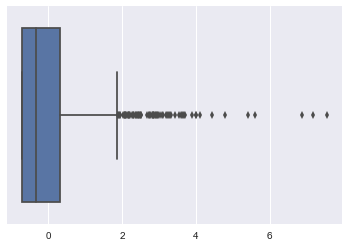

In [26]:
sns.boxplot(openporchsf_scaled)

##### Bivariate outliers

width:  381.62945119161753
heigth:  482344.5516831825
angle:  -0.0150897171754


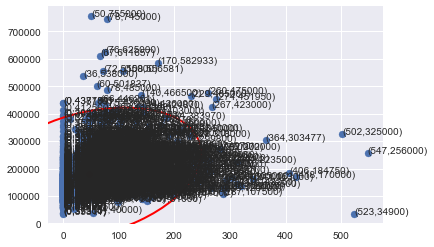

In [63]:
bivariate_outlier_analysis(train_data["OpenPorchSF"], target_variable)

#### EnclosedPorch

In [27]:
train_data['EnclosedPorch'].describe()

count    1459.000000
mean       21.969157
std        61.137400
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64

##### Univariate outliers

In [28]:
enclosedporch_scaled = scale_variable(train_data['EnclosedPorch'])

outer range (low) of the distribution
[[-0.35946393]
 [-0.35946393]
 [-0.35946393]
 [-0.35946393]
 [-0.35946393]
 [-0.35946393]
 [-0.35946393]
 [-0.35946393]
 [-0.35946393]
 [-0.35946393]]
outer range (high) of the distribution
[[ 4.22195444]
 [ 4.32012769]
 [ 4.40193874]
 [ 4.43466315]
 [ 4.45102536]
 [ 4.56556082]
 [ 4.84371837]
 [ 5.04006487]
 [ 5.95634854]
 [ 8.67247515]]


/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


/Applications/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


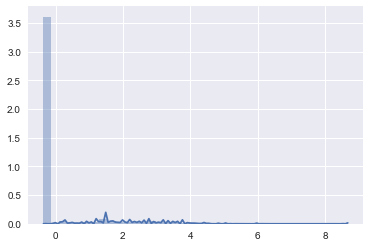

In [30]:
sns.distplot(enclosedporch_scaled)

##### Bivariate outliers

width:  367.9968193632003
heigth:  482344.53731678816
angle:  0.00566973614649


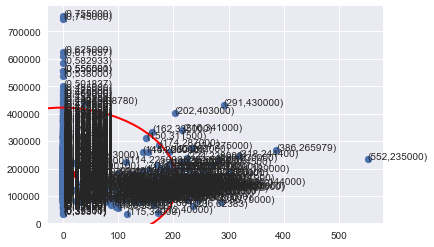

In [64]:
bivariate_outlier_analysis(train_data["EnclosedPorch"], target_variable)

#### 3SsnPorch

In [31]:
train_data['3SsnPorch'].describe()

count    1459.000000
mean        3.411926
std        29.327247
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64

##### Univariate outliers

In [32]:
threessnporch_scaled = scale_variable(train_data['3SsnPorch'])

outer range (low) of the distribution
[[-0.11637969]
 [-0.11637969]
 [-0.11637969]
 [-0.11637969]
 [-0.11637969]
 [-0.11637969]
 [-0.11637969]
 [-0.11637969]
 [-0.11637969]
 [-0.11637969]]
outer range (high) of the distribution
[[  6.56911675]
 [  7.25131027]
 [  7.25131027]
 [  8.00172313]
 [  8.24049086]
 [  9.77542627]
 [ 10.25296173]
 [ 10.79871654]
 [ 13.76625833]
 [ 17.21133558]]


/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


/Applications/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


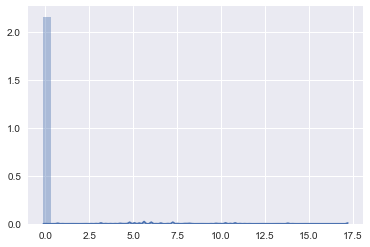

In [34]:
sns.distplot(threessnporch_scaled)

#### ScreenPorch

In [35]:
train_data['ScreenPorch'].describe()

count    1459.000000
mean       15.071282
std        55.775138
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64

##### Univariate outliers

In [36]:
screenporch_scaled = scale_variable(train_data['ScreenPorch'])

outer range (low) of the distribution
[[-0.2703077]
 [-0.2703077]
 [-0.2703077]
 [-0.2703077]
 [-0.2703077]
 [-0.2703077]
 [-0.2703077]
 [-0.2703077]
 [-0.2703077]
 [-0.2703077]]
outer range (high) of the distribution
[[ 4.8950538 ]
 [ 4.94885965]
 [ 5.32550059]
 [ 5.50485342]
 [ 6.43748814]
 [ 6.63477625]
 [ 6.83206437]
 [ 7.08315833]
 [ 7.62121682]
 [ 8.33862814]]


/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


/Applications/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


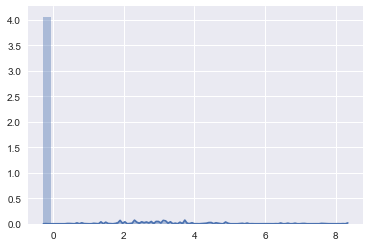

In [37]:
sns.distplot(screenporch_scaled)

##### Bivariate outliers

width:  336.42469863895116
heigth:  482344.5364299827
angle:  -0.00448049280973


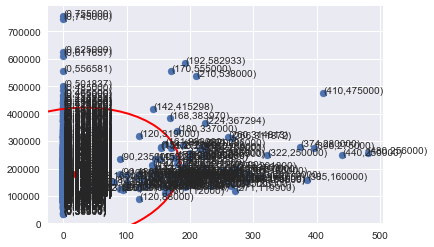

In [65]:
bivariate_outlier_analysis(train_data["ScreenPorch"], target_variable)

#### PoolArea

In [38]:
train_data['PoolArea'].describe()

count    1459.000000
mean        2.760795
std        40.191018
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64

##### Univariate outliers

In [39]:
poolarea_scaled = scale_variable(train_data['PoolArea'])

outer range (low) of the distribution
[[-0.0687154]
 [-0.0687154]
 [-0.0687154]
 [-0.0687154]
 [-0.0687154]
 [-0.0687154]
 [-0.0687154]
 [-0.0687154]
 [-0.0687154]
 [-0.0687154]]
outer range (high) of the distribution
[[ -0.0687154 ]
 [ -0.0687154 ]
 [ -0.0687154 ]
 [ 11.87834658]
 [ 12.67481738]
 [ 12.84904537]
 [ 13.74507502]
 [ 14.26775898]
 [ 16.05981828]
 [ 18.2998924 ]]


/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


/Applications/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


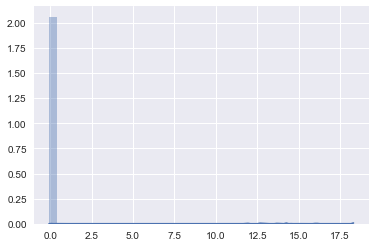

In [40]:
sns.distplot(poolarea_scaled)

##### Bivariate outliers

width:  242.89973440803593
heigth:  482344.53548180824
angle:  -0.00267738240109


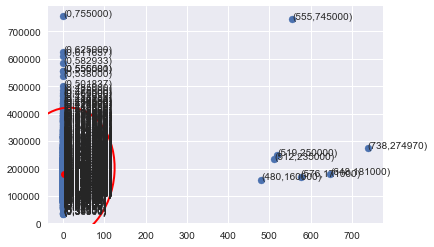

In [66]:
bivariate_outlier_analysis(train_data["PoolArea"], target_variable)

#### MiscVal
This value is given in $ dollars. Inflation not respected.

In [41]:
train_data['MiscVal'].describe()

count     1459.000000
mean        43.518849
std        496.291826
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64

##### Univariate outliers

In [43]:
miscval_scaled = scale_variable(train_data['MiscVal'])

outer range (low) of the distribution
[[-0.08771809]
 [-0.08771809]
 [-0.08771809]
 [-0.08771809]
 [-0.08771809]
 [-0.08771809]
 [-0.08771809]
 [-0.08771809]
 [-0.08771809]
 [-0.08771809]]
outer range (high) of the distribution
[[  2.53260663]
 [  2.73417007]
 [  3.94355071]
 [  3.94355071]
 [  3.94355071]
 [  3.94355071]
 [  4.95136791]
 [  6.96700231]
 [ 16.64204744]
 [ 31.15461512]]


/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


/Applications/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


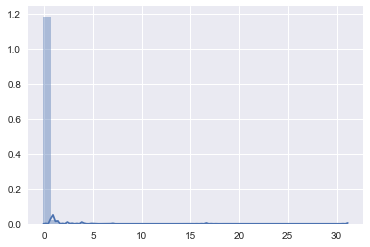

In [44]:
sns.distplot(miscval_scaled)

##### Bivariate outliers

width:  3011.614035532385
heigth:  482344.539182794
angle:  0.00758603767132


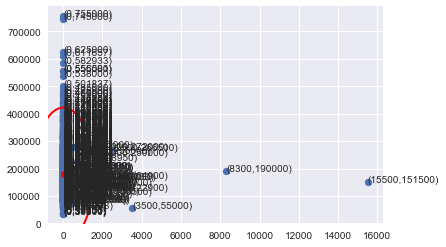

In [67]:
bivariate_outlier_analysis(train_data["MiscVal"], target_variable)

## Overall outliers - Mahalanobis distance

In [29]:
id = train_data['Id']
train_data = train_data.drop(['Id', 'SalePrice'], axis=1)

In [30]:
emp_cov = EmpiricalCovariance().fit(train_data)

In [31]:
mahalanobis_dist = emp_cov.mahalanobis(train_data)/train_data.shape[1]

In [32]:
outliers = mahalanobis_dist[mahalanobis_dist > 2.5]
print(outliers)

346    3.897921
dtype: float64


In [33]:
train_data['mahalanobis_dist'] = mahalanobis_dist

In [38]:
# add mahalanobis distance to train data file
train_data.to_csv("../data/outlier_train_data.csv", index=False)